In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Data/publication_data.csv')

In [5]:
df.columns = ['cell_index', 'dendrite_index', 'spine_index', 'im_session', 'sipne_I', 'shape_1', 'shape_2', 'dist', 'x_CM', 'y_CM', 'x_den', 'y_den','z_den']

In [46]:
spine_dict = {}
count = 0

In [47]:
def add_spine_id(row):
    global count
    spine_tuple = (row['cell_index'], row['dendrite_index'], row['spine_index'])
    if spine_tuple in spine_dict.keys():
        spine_id = spine_dict[spine_tuple]
    else:
        count += 1
        spine_dict[spine_tuple] = count
        spine_id = spine_dict[spine_tuple]
    return spine_id

df['spine_id'] = df.apply (lambda row: add_spine_id(row), axis=1)

In [58]:
num_spines = df['spine_id'].nunique()
g = 0.37/df['shape_param'].mean()

In [59]:
g

0.8214604835007783

In [8]:
df['shape_param'] = df.apply (lambda row: compute_shape(row), axis=1)

In [230]:
nums = np.random.choice([0, 1], size=64, p=[.49, .51])

In [231]:
def bool_to_eff(x, session):
    global num_spines
    global g
    if int(x) == 1:
        spine_id = np.random.randint(1, num_spines)
        index = np.where((df['spine_id'] == spine_id) & (df['im_session'] == session))
        if len(index[0]) == 0:
            y = 0
        else:
            y = df.iloc[index]['shape_param'].mean()*g
    else:
        y = 0
    return y

In [232]:
vfunc = np.vectorize(bool_to_eff)

nums = vfunc(nums, session = 1)
nums2D = nums.reshape(8,8).astype(float)

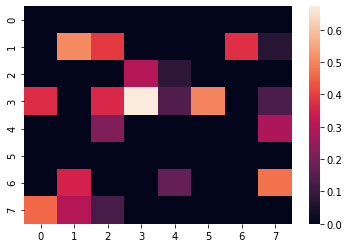

In [233]:
plot=sns.heatmap(nums2D)